In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shrutibhargava94_india_air_quality_data_path = kagglehub.dataset_download('shrutibhargava94/india-air-quality-data')

print('Data source import complete.')


Using Colab cache for faster access to the 'india-air-quality-data' dataset.
Data source import complete.


Mean (mu): 25.804148934144695
Lambda: 0.0014596395020856768
C: 0.021554992084857203


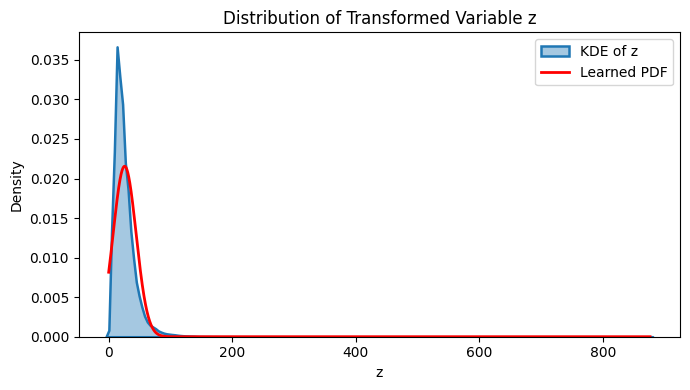

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../kaggle/input/india-air-quality-data/data.csv', encoding='latin1', low_memory=False)

x = pd.to_numeric(df['no2'], errors='coerce').dropna().values

r = 102317248

ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)

z = x + ar * np.sin(br * x)

mu = np.mean(z)
sigma2 = np.var(z)

lam = 1 / (2 * sigma2)
c = math.sqrt(lam / math.pi)

print("Mean (mu):", mu)
print("Lambda:", lam)
print("C:", c)

z_sorted = np.sort(z)
pdf = c * np.exp(-lam * (z_sorted - mu)**2)

plt.figure(figsize=(7,4))

sns.kdeplot(z, fill=True, alpha=0.4, linewidth=1.8, label="KDE of z")
plt.plot(z_sorted, pdf, color='red', linewidth=2, label="Learned PDF")

plt.title("Distribution of Transformed Variable z")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()